### Car price prediction poland

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [42]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/Car_Prices_Poland_Kaggle.csv')
df.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [43]:
df.drop(['Unnamed: 0','mark','generation_name','year','city','province'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   model       117927 non-null  object
 1   mileage     117927 non-null  int64 
 2   vol_engine  117927 non-null  int64 
 3   fuel        117927 non-null  object
 4   price       117927 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.5+ MB


In [44]:
df.duplicated().sum()

8144

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.describe()

,mileage,vol_engine,price
count,1.097830e+05,109783.000000,1.097830e+05
mean,1.425743e+05,1811.560287,6.815431e+04
std,9.153029e+04,642.036778,8.233279e+04
min,0.000000e+00,0.000000,5.000000e+02
25%,7.070000e+04,1461.000000,2.100000e+04
50%,1.480000e+05,1781.000000,4.099900e+04
75%,2.034175e+05,1995.000000,7.990000e+04
max,2.800000e+06,7600.000000,2.399900e+06


In [47]:
df.columns

Index(['model', 'mileage', 'vol_engine', 'fuel', 'price'], dtype='object')

In [48]:
df.model.value_counts()

model
astra       3142
seria-3     2872
a4          2870
golf        2492
a6          2399
            ... 
thalia        28
karl          27
omega         20
frontera      18
ampera        10
Name: count, Length: 328, dtype: int64

In [49]:
def shorten_cat(categories,cuttoff):
    map = {}
    for i in range(len(categories)):
        if categories.values[i] >=cuttoff:
            map[categories.index[i]] = categories.index[i]
        else:
            map[categories.index[i]] = 'Other'
    return map
df['model'] = df['model'].map(shorten_cat(df['model'].value_counts(),1000))

In [50]:
df = df[df['model'] != 'Other']
df.model.value_counts()

model
astra       3142
seria-3     2872
a4          2870
golf        2492
a6          2399
seria-5     2385
focus       2108
octavia     1979
passat      1959
mondeo      1829
a3          1620
megane      1533
insignia    1513
qashqai     1406
corsa       1391
c-klasa     1345
e-klasa     1280
fabia       1278
clio        1251
leon        1143
sportage    1103
fiesta      1073
i30         1055
seria-1     1040
ceed        1019
Name: count, dtype: int64

In [51]:
print(f"Highest mileage ever recorded is: {df.mileage.max()}")
print(f"Lowest mileage ever recorded is: {df.mileage.min()}")

Highest mileage ever recorded is: 2500000
Lowest mileage ever recorded is: 0


<Axes: xlabel='mileage', ylabel='Count'>

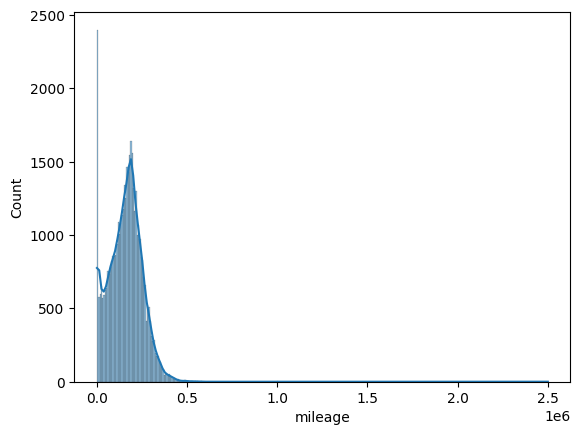

In [52]:
sns.histplot(x=df.mileage,kde=True)

<Axes: xlabel='mileage'>

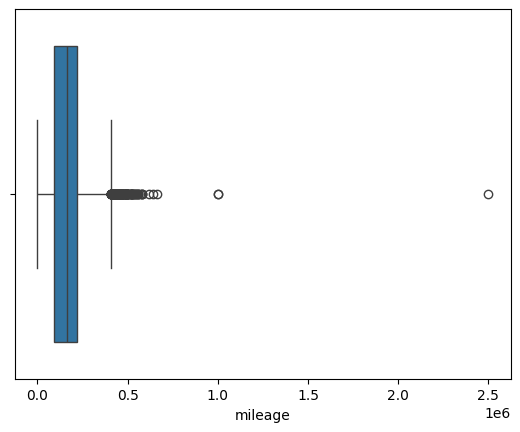

In [53]:
sns.boxplot(x=df.mileage)

In [54]:
print(f"Highest volume engine is {df.vol_engine.max()}")
print(f"Lowest volume engine is {df.vol_engine.min()}")

Highest volume engine is 6208
Lowest volume engine is 0


<Axes: xlabel='vol_engine', ylabel='Count'>

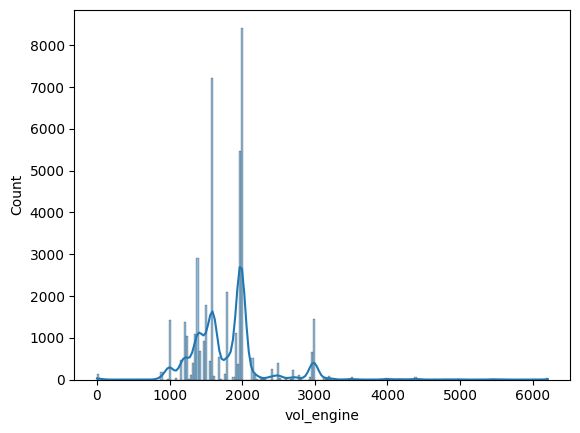

In [55]:
sns.histplot(x=df.vol_engine,kde=True)

<Axes: ylabel='vol_engine'>

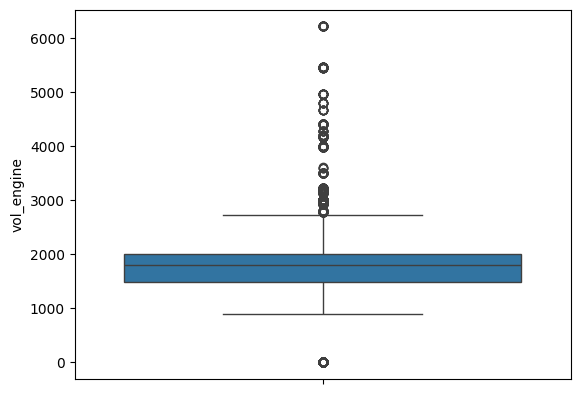

In [56]:
sns.boxplot(df.vol_engine)

In [57]:
df.fuel.value_counts()

fuel
Gasoline    21654
Diesel      19267
LPG          1768
Hybrid        350
Electric       35
CNG            11
Name: count, dtype: int64

In [58]:
df['fuel'] = df['fuel'].map(shorten_cat(df['fuel'].value_counts(),1000))
df = df[df['fuel'] != 'Other']

<Axes: xlabel='fuel', ylabel='count'>

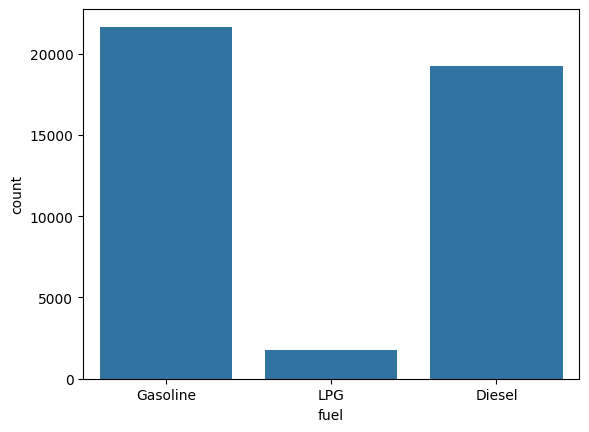

In [59]:
sns.countplot(x=df.fuel)

<Axes: xlabel='price', ylabel='Count'>

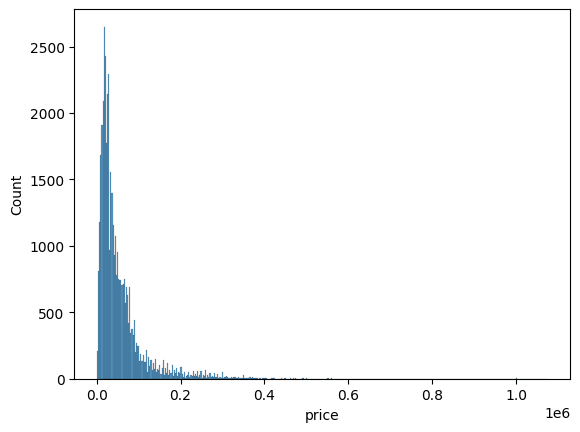

In [60]:
sns.histplot(x=df.price)

<Axes: ylabel='price'>

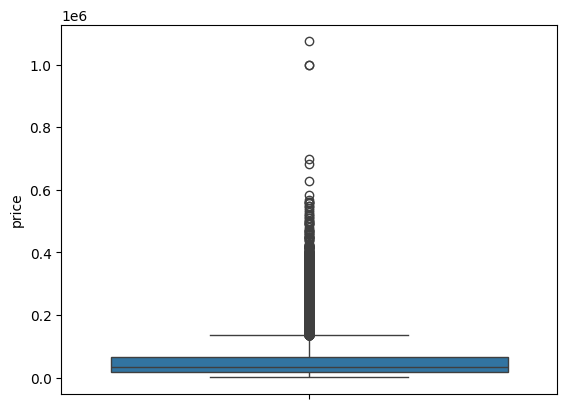

In [61]:
sns.boxplot(df.price)

In [62]:
outlier = ['mileage','vol_engine','price']
print(f"shape of data with outliers is {df.shape}")
for col in outlier:
    upper = df[col].mean() + (2*df[col].std())
    lower = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper) & (df[col] > lower)]
print(f"shape of data without outliers is {df.shape}")

shape of data with outliers is (42689, 5)
shape of data without outliers is (37105, 5)


In [63]:
df = df.sample(frac=1).reset_index(drop=True)

In [64]:
df['price(usd)'] = df['price'].apply(lambda x: x*0.25)
df.drop('price',axis=1,inplace=True)
df.head()

,model,mileage,vol_engine,fuel,price(usd)
0,c-klasa,268500,2148,Diesel,962.5
1,clio,276000,1149,Gasoline,400.0
2,astra,100000,1364,Gasoline,8750.0
3,a3,218000,1600,Gasoline,2225.0
4,sportage,95278,1591,Gasoline,14000.0


In [65]:
df.model.value_counts()

model
astra       3121
golf        2391
a4          2385
seria-3     2161
focus       2052
octavia     1867
passat      1793
mondeo      1713
megane      1503
a3          1491
insignia    1445
qashqai     1383
corsa       1361
fabia       1266
clio        1238
leon        1118
a6          1114
seria-5     1110
sportage    1076
fiesta      1071
i30         1046
seria-1      990
ceed         986
c-klasa      974
e-klasa      450
Name: count, dtype: int64

In [66]:
df.fuel.value_counts()

fuel
Gasoline    19835
Diesel      15731
LPG          1539
Name: count, dtype: int64

In [67]:
df.fuel = df.fuel.map({
    'Gasoline':2,
    'Diesel':1,
    'LPG':0
})
df.head()

,model,mileage,vol_engine,fuel,price(usd)
0,c-klasa,268500,2148,1,962.5
1,clio,276000,1149,2,400.0
2,astra,100000,1364,2,8750.0
3,a3,218000,1600,2,2225.0
4,sportage,95278,1591,2,14000.0


In [68]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/cleaned_car.csv',index=False)

In [69]:
encoder = LabelEncoder()
df['model'] = encoder.fit_transform(df['model'])

In [70]:
X = df.drop('price(usd)',axis=1)
y = df['price(usd)']

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
models = {
    'Linear Regression':LinearRegression(),
    'KNeighbours':KNeighborsRegressor(),
    'Cat Boost':CatBoostRegressor(),
    'XGB':XGBRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),  
}

In [72]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = r2_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with score of {best_score}")

Learning rate set to 0.069248
0:	learn: 7335.0833628	total: 348ms	remaining: 5m 48s
1:	learn: 7068.7688301	total: 371ms	remaining: 3m 5s
2:	learn: 6835.1759507	total: 391ms	remaining: 2m 9s
3:	learn: 6622.6479335	total: 405ms	remaining: 1m 40s
4:	learn: 6417.7392726	total: 418ms	remaining: 1m 23s
5:	learn: 6236.9528505	total: 426ms	remaining: 1m 10s
6:	learn: 6072.2466262	total: 432ms	remaining: 1m 1s
7:	learn: 5931.1339052	total: 441ms	remaining: 54.7s
8:	learn: 5797.3084689	total: 448ms	remaining: 49.4s
9:	learn: 5673.7487376	total: 467ms	remaining: 46.3s
10:	learn: 5557.6791611	total: 477ms	remaining: 42.9s
11:	learn: 5455.2217479	total: 486ms	remaining: 40s
12:	learn: 5359.8678903	total: 498ms	remaining: 37.8s
13:	learn: 5274.1845757	total: 506ms	remaining: 35.6s
14:	learn: 5195.9731513	total: 513ms	remaining: 33.7s
15:	learn: 5127.5002323	total: 520ms	remaining: 32s
16:	learn: 5066.9564616	total: 528ms	remaining: 30.5s
17:	learn: 5007.3438667	total: 534ms	remaining: 29.1s
18:	lear

In [73]:
reg = models[best_model_name]
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
pred[:5]

Learning rate set to 0.069248
0:	learn: 7335.0833628	total: 34.6ms	remaining: 34.6s
1:	learn: 7068.7688301	total: 51.1ms	remaining: 25.5s
2:	learn: 6835.1759507	total: 65.4ms	remaining: 21.7s
3:	learn: 6622.6479335	total: 76.6ms	remaining: 19.1s
4:	learn: 6417.7392726	total: 84ms	remaining: 16.7s
5:	learn: 6236.9528505	total: 93.7ms	remaining: 15.5s
6:	learn: 6072.2466262	total: 101ms	remaining: 14.3s
7:	learn: 5931.1339052	total: 109ms	remaining: 13.5s
8:	learn: 5797.3084689	total: 115ms	remaining: 12.7s
9:	learn: 5673.7487376	total: 123ms	remaining: 12.1s
10:	learn: 5557.6791611	total: 130ms	remaining: 11.7s
11:	learn: 5455.2217479	total: 139ms	remaining: 11.4s
12:	learn: 5359.8678903	total: 147ms	remaining: 11.2s
13:	learn: 5274.1845757	total: 155ms	remaining: 10.9s
14:	learn: 5195.9731513	total: 163ms	remaining: 10.7s
15:	learn: 5127.5002323	total: 169ms	remaining: 10.4s
16:	learn: 5066.9564616	total: 176ms	remaining: 10.2s
17:	learn: 5007.3438667	total: 182ms	remaining: 9.95s
18:	

array([ 4913.27989089,  5308.04714819, 13763.96504496,  5552.77847214,
        6334.47326513])

In [74]:
y_test[:5]

19634     2725.0
8919      8000.0
27403    18200.0
26061     8250.0
17481     6625.0
Name: price(usd), dtype: float64